<a href="https://colab.research.google.com/github/pcbl/DeepDriver/blob/master/LearnPython/Jupyter/Carla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install carla
#Doies not work as we need a newer version! 0.9.5 is too old!

#Let´s mount from google drive then
from google.colab import drive
drive.mount('/content/gdrive')
#ls '/content/gdrive/My Drive/carla'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import glob
import os
import sys
import random
import time
import numpy as np
import cv2
sys.path.append('/content/gdrive/My Drive/carla/carla-0.9.9-py3.7-linux-x86_64.egg')
import carla

from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [4]:
#IM_WIDTH = 640
#IM_HEIGHT = 480
IM_WIDTH = 320
IM_HEIGHT = 240

In [12]:
def process_img(image):
    i = np.array(image.raw_data)
    i2 = i.reshape((IM_HEIGHT, IM_WIDTH, 4))
    i3 = i2[:, :, :3]
    #cv2_imshow(i3)
    clear_output()
    plt.imshow(i3)
    plt.show()    
    sleep(1)  
    return i3/255.0

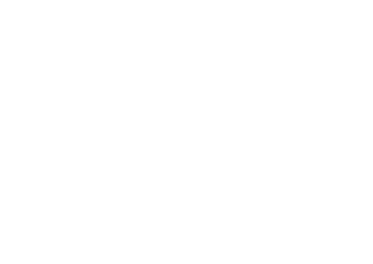

KeyboardInterrupt: ignored

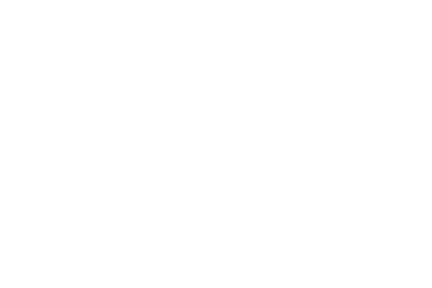

In [20]:
actor_list = []

client = carla.Client('40.113.121.238', 2000)
client.set_timeout(30.0)
world = client.get_world()

#Getting Tesla Blueprint
blueprint_library = world.get_blueprint_library()
bp = blueprint_library.filter('model3')[0]

#Spawnig it!
spawn_point = world.get_map().get_spawn_points()[5]
vehicle = world.spawn_actor(bp, spawn_point)

#Accelerate!
vehicle.apply_control(carla.VehicleControl(throttle=1.0, steer=0.0))

actor_list.append(vehicle)

# get the blueprint for this sensor
blueprint = blueprint_library.find('sensor.camera.rgb')
# change the dimensions of the image
blueprint.set_attribute('image_size_x', f'{IM_WIDTH}')
blueprint.set_attribute('image_size_y', f'{IM_HEIGHT}')
blueprint.set_attribute('fov', '110')
blueprint.set_attribute('sensor_tick', '0')


# Adjust sensor relative to vehicle
spawn_point = carla.Transform(carla.Location(x=2.5, z=0.7))

# spawn the sensor and attach to vehicle.
sensor = world.spawn_actor(blueprint, spawn_point, attach_to=vehicle)

# add sensor to list of actors
actor_list.append(sensor)

# do something with this sensor
sensor.listen(lambda data: process_img(data))

while True:
  # As soon as the server is ready continue!
  vehicle.apply_control(carla.VehicleControl(throttle=.2, steer=0.0))
  if not world.wait_for_tick(1):
    continue
  # as soon as the server is ready continue!
  world.wait_for_tick(1)